# Exploratory Data Analysis

### [RQ1] In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day.

In [54]:
import pandas as pd

def month_avg(x, m_len):                            
    return x['PULocationID'].shape[0] / m_len


avg_trips_per_day = []
avg_trips_per_borough = []


#number of passengers per timeslot
time_slot = [('07:00', '13:00'), ('13:00', '17:00'), ('17:00', '22:00'), ('22:00', '07:00')]
# these time slots correspond to 'early morning-workers/students heading at their work place/univ'
# 'lunch time-people getting home for lunch (part-time workers)'
# 'after work (shopping, killing time)'
# 'night life'

passenger_count = [[] for ts in time_slot]
passenger_count_per_borough = [[] for ts in time_slot]

month_len = (31, 28)#, 31, 30, 31, 30)
for i in range(1, len(month_len) + 1):
    data = pd.read_csv('./data/yellow_tripdata_2018-0' + str(i) + '.csv', parse_dates=[1,2], index_col=1)
    
    #average number of trips per day
    total_trips = len(data)
    avg_trips_per_day.append(total_trips / month_len[i-1])
    
    #average number of trips per day per borough
    avg_trips_per_borough.append(data.groupby('PULocationID').apply(month_avg, (month_len[i-1])))
    
    for j in range(len(time_slot)):
        dts = data.between_time(*time_slot[j])
        passenger_count[j].append(dts['passenger_count'].sum())
        passenger_count_per_borough[j].append(dts.groupby('PULocationID')['passenger_count'].sum())
    


[Text(0,0,'Jan'), Text(0,0,'Feb')]

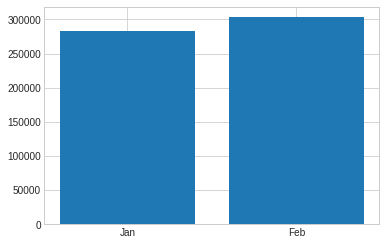

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-whitegrid')

months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')
y_pos = np.arange(len(month_len))

fig, ax = plt.subplots()

ax.bar(y_pos, avg_trips_per_day)

ax.set_xticks(y_pos)
ax.set_xticklabels(months)

### Due to the differences among New York zones, we want to visualize the same information for each boroughs.

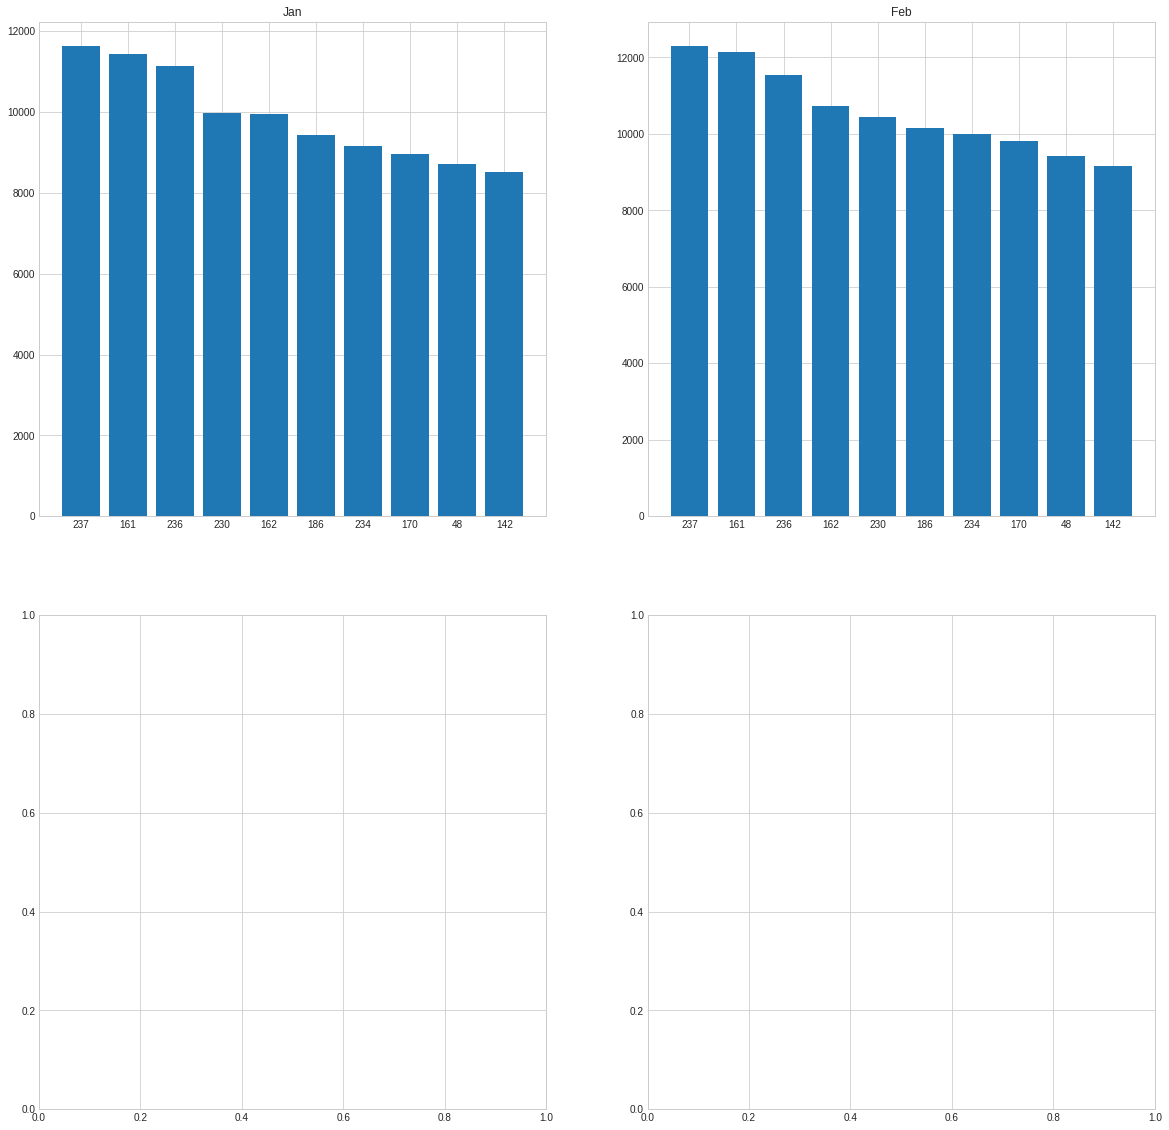

In [18]:
nrow = 2 if int(len(month_len) / 3 + 1) == 1 else int(len(month_len) / 3 + 1)
ncol = int(len(month_len) / nrow + 1)
fig, axes = plt.subplots(nrow, ncol, figsize=(20,20))

n_largest = 10
row = 0
col = 0
for i in range(len(avg_trips_per_borough)):
    if i == ncol:
        row += 1
        col = 0
    highest_vals = avg_trips_per_borough[i].nlargest(n_largest)
    
    x_pos = np.arange(n_largest)
    axes[row, col].bar(x_pos, highest_vals)
    axes[row, col].set_xticks(x_pos)
    axes[row, col].set_xticklabels(highest_vals.index)
    axes[row, col].set_title(months[i])
    col += 1

## Comments here... Provide comments and plausible explanations about what you observe 
## (e.g.: what is the month with the highest daily average?)

## [RQ2] What are the time slots with more passengers? Set your own time slots and discover which are those 
## when Taxis drive the highest number of passengers overall New York

[Text(0,0,"('07:00', '13:00')"),
 Text(0,0,"('13:00', '17:00')"),
 Text(0,0,"('17:00', '22:00')"),
 Text(0,0,"('22:00', '07:00')")]

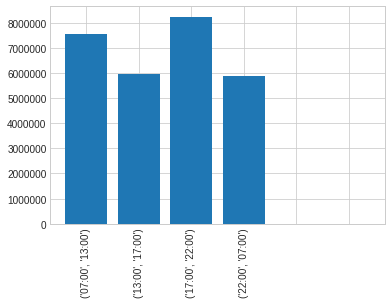

In [36]:
fig, ax = plt.subplots()

tot_passenger_count = []
for pc in passenger_count:
    tot_passenger_count.append(sum(pc))

x_pos = np.arange(len(tot_passenger_count))
ax.bar(x_pos, tot_passenger_count)
ax.set_xticks(x_pos)
ax.set_xticklabels(time_slot, rotation = 90)

## repeat the analysis for each borough

In [53]:
len(passenger_count_per_borough)

6

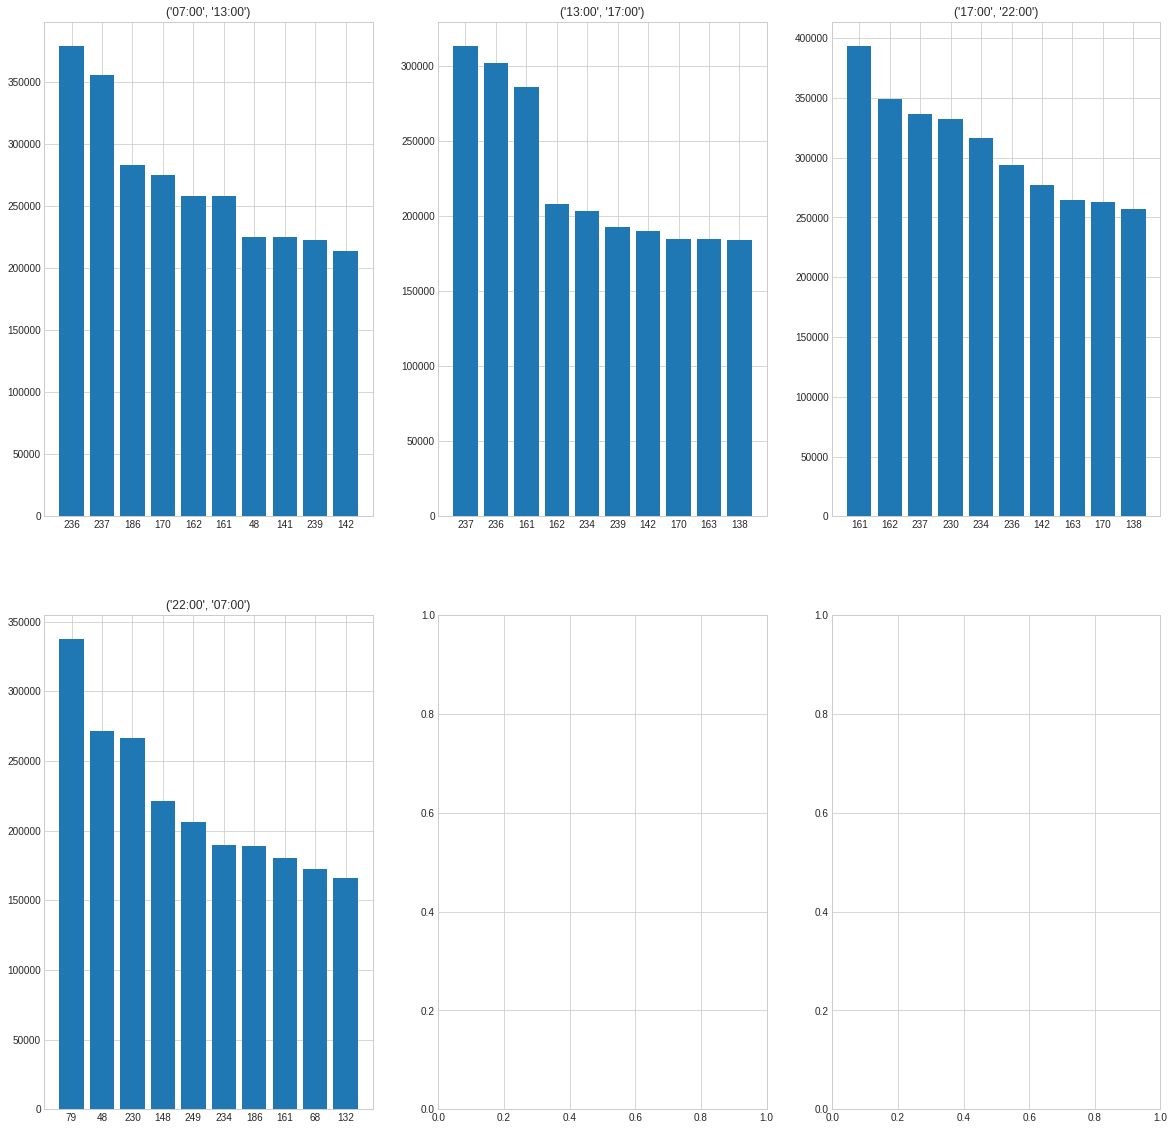

In [55]:
from functools import reduce

# calculate passenger per borough over the entire time period considered in every time slot
ppt_pb = []
for ppm in passenger_count_per_borough:
    ppt_pb.append(reduce(lambda x, y: x.add(y, fill_value=0), ppm))

#set up the plot
nrow = 2 if int(len(passenger_count_per_borough) / 3 + 1) == 1 else int(len(passenger_count_per_borough) / 3 + 1)
ncol = int(len(passenger_count_per_borough) / nrow + 1)
fig, axes = plt.subplots(nrow, ncol, figsize=(20,20))

n_largest = 10
row = 0
col = 0
for i in range(len(ppt_pb)):
    if i == ncol:
        row += 1
        col = 0
    highest_vals = ppt_pb[i].nlargest(n_largest)
    
    x_pos = np.arange(n_largest)
    axes[row, col].bar(x_pos, highest_vals)
    axes[row, col].set_xticks(x_pos)
    axes[row, col].set_xticklabels(highest_vals.index)
    axes[row, col].set_title(time_slot[i])
    col += 1
    